## AutoDistill Inference On Milk Bottles

##### Importing the libraries

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn
import torch

##### Setting up Device agnostic Code

In [2]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [3]:
device

'cuda'

In [4]:
pwd

'/home/ubuntu/Documents/autodistill try'

In [12]:

import supervision as sv

image_paths = sv.list_files_with_extensions(
    directory=IMAGE_DIR_PATH,
    extensions=["png", "jpg", "jpg"])

print('image count:', len(image_paths))

image count: 524


##### Visualizing the Input Images in a grid

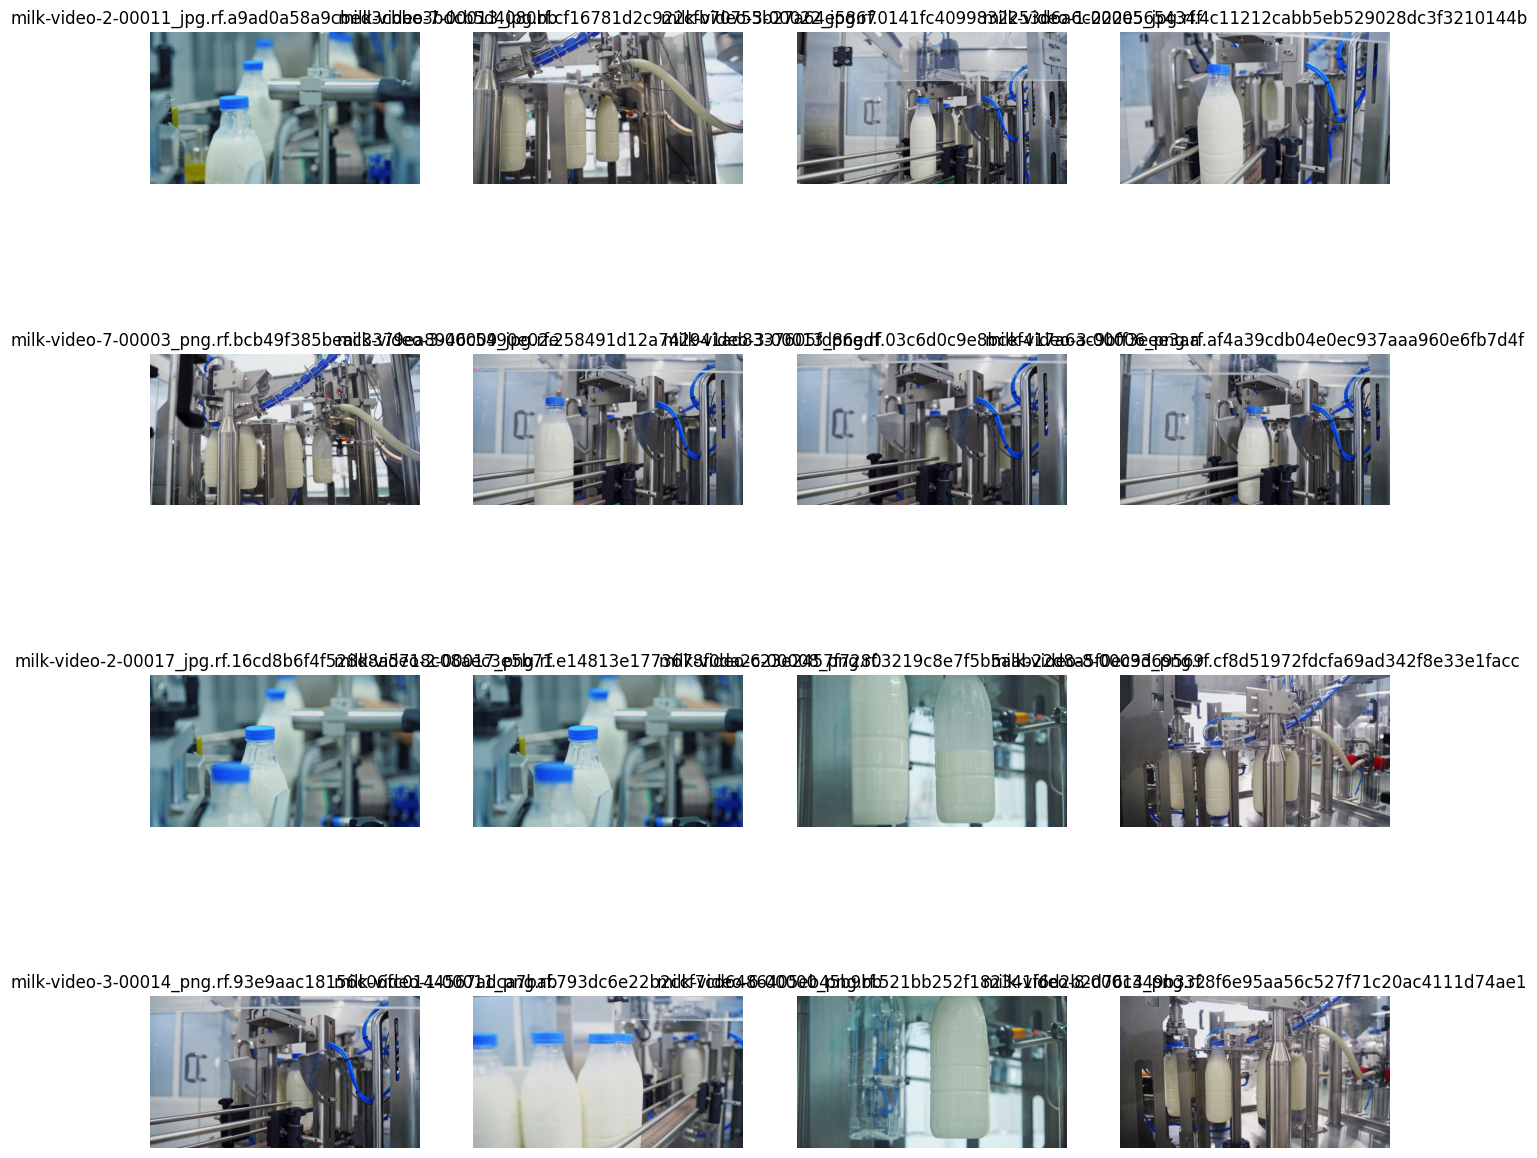

In [13]:
SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 16)
     

import cv2
import supervision as sv

titles = [
    image_path.stem
    for image_path
    in image_paths[:SAMPLE_SIZE]]
images = [
    cv2.imread(str(image_path))
    for image_path
    in image_paths[:SAMPLE_SIZE]]

sv.plot_images_grid(images=images, titles=titles, grid_size=SAMPLE_GRID_SIZE, size=SAMPLE_PLOT_SIZE)
     


In [5]:
from pathlib import Path
HOME=Path('/home/ubuntu/Documents/autodistill try')

##### Adding the prompts and the labels

In [14]:
from autodistill.detection import CaptionOntology
ontology = CaptionOntology({
    "milk bottle": "bottle",
    "blue cap": "cap"
})


##### Initializing the Paths for the model

In [7]:
DATASET_DIR_PATH="/home/ubuntu/Documents/autodistill try/dataset"
ANNOTATIONS_DIRECTORY_PATH="/home/ubuntu/Documents/autodistill try/dataset/train/labels"
IMAGES_DIRECTORY_PATH="/home/ubuntu/Documents/autodistill try/dataset/train/images"

In [8]:
DATA_YAML_PATH="/home/ubuntu/Documents/autodistill try/dataset/data.yaml"

In [9]:
IMAGE_DIR_PATH=("/home/ubuntu/Documents/autodistill try/images")

##### Setting up the output Directory

In [17]:
from autodistill_grounded_sam import GroundedSAM

base_model = GroundedSAM(ontology=ontology)
dataset = base_model.label(
    input_folder=IMAGE_DIR_PATH,
    extension=".jpg",
    output_folder=DATASET_DIR_PATH)
     

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /home/ubuntu/Documents/autodistill try/images/milk-video-2-00011_jpg.rf.a9ad0a58a9cbed3cbbe3bdcb5d4080bb.jpg:   0%|          | 0/262 [00:00<?, ?it/s]The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None
Labeling /home/ubuntu/Documents/autodistill try/images/milk-video-1-00003_jpg.rf.8c6e3cf2a3a329be2d68c145bb1d94da.jpg: 100%|██████████| 262/262 [09:10<00:00,  2.10s/it]


Labeled dataset created - ready for distillation.


In [18]:
import supervision as sv

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=IMAGES_DIRECTORY_PATH,
    annotations_directory_path=ANNOTATIONS_DIRECTORY_PATH,
    data_yaml_path=DATA_YAML_PATH)

len(dataset)

209

##### Inferencing the model

annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in 

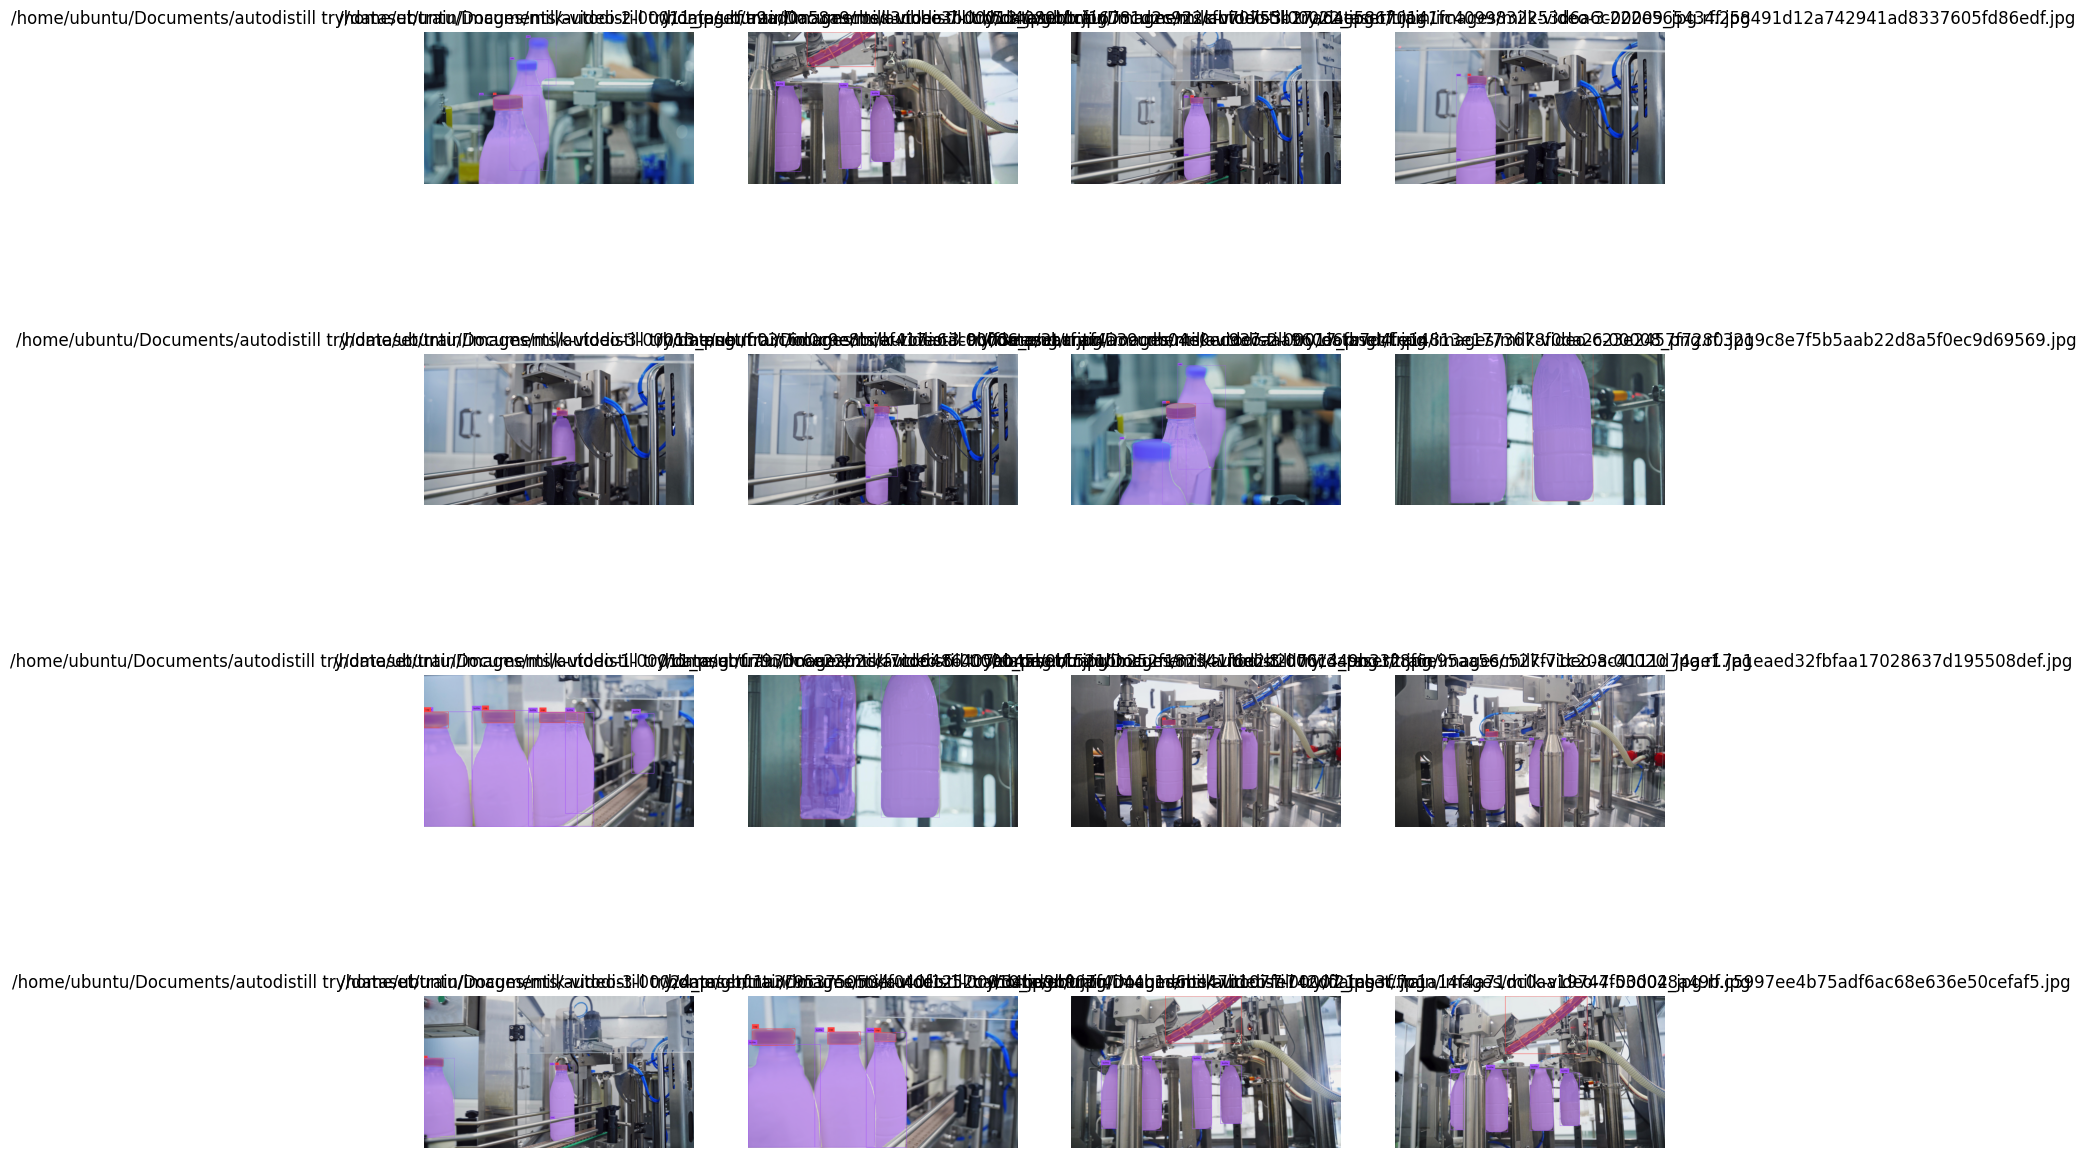

In [19]:
import supervision as sv

image_names = list(dataset.images.keys())[:SAMPLE_SIZE]

mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator()

images = []
for image_name in image_names:
    image = dataset.images[image_name]
    annotations = dataset.annotations[image_name]
    labels = [
        dataset.classes[class_id]
        for class_id
        in annotations.class_id]
    annotates_image = mask_annotator.annotate(
        scene=image.copy(),
        detections=annotations)
    annotates_image = box_annotator.annotate(
        scene=annotates_image,
        detections=annotations,
        labels=labels)
    images.append(annotates_image)

sv.plot_images_grid(
    images=images,
    titles=image_names,
    grid_size=SAMPLE_GRID_SIZE,
    size=SAMPLE_PLOT_SIZE)